In [1]:
import numpy as np
from Utils.GridGraph import GridGraph
from MultiRobotTargetSearch import MultiRobotTargetSearch
from Utils.DTMC_Utils import DTMC_Utils


In [2]:
np.random.seed(12345)

In [3]:
reference_information_state = 1
Z_r = [4, 5, 6] 

print("The reference information state is: " + str(reference_information_state))
print("Target is observable from nodes: " + str(Z_r))

The reference information state is: 1
Target is observable from nodes: [4, 5, 6]


[0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1 ]


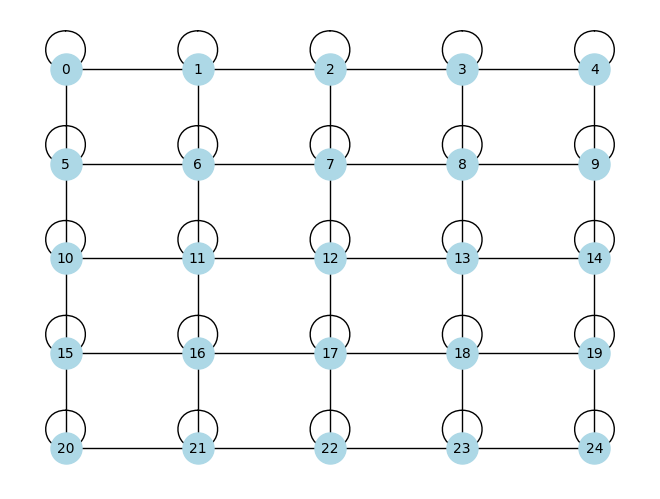

In [4]:
N = 5  # number of agents

# alphas =[0.6, 0.8, 0.9, 0.95, 0.98, 1, 1.02, 1.05, 1.1] 
#alphas = np.linspace(0.01, 2, 10)
alphas = np.linspace(0.9, 1.1, 11)
alphas = np.round(alphas, decimals=5) 
print(alphas)

map_width = 5  # (meters)
map_height = 5

S = map_width * map_height  # number of nodes (locations)

grid_graph = GridGraph(map_width, map_height)
grid_graph.plot_graph() 

alpha: 0.9:
alpha: 0.92:
alpha: 0.94:
alpha: 0.96:
alpha: 0.98:
alpha: 1.0:
alpha: 1.02:
alpha: 1.04:
alpha: 1.06:
alpha: 1.08:
alpha: 1.1:


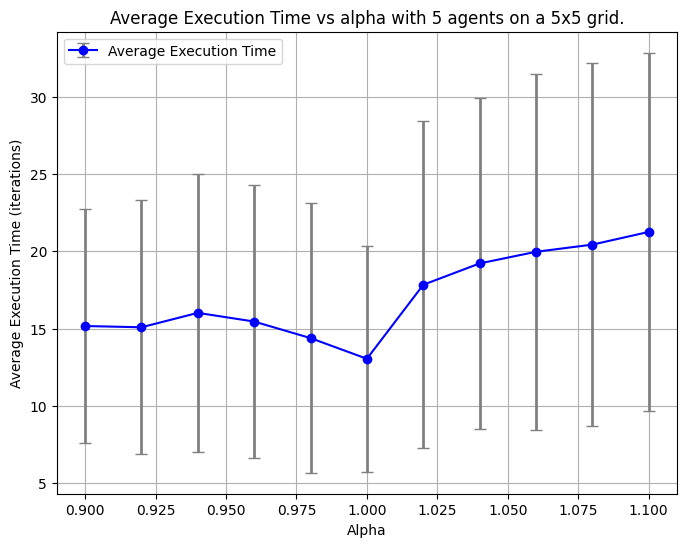

In [5]:
num_of_experiments = 500
average_consensus_time = []
average_standard_deviation = []

for alpha in alphas:
    print(f"alpha: {alpha}:")
    consensus_times = []

    for j in range(num_of_experiments): 
        # print(f"Iteration {j}:")
        agents = DTMC_Utils.initAgents(N, S)
        experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
        experiment.run()
        consensus_times.append(experiment.getMeanConsensusTime())

    average_consensus_time.append(np.mean(consensus_times))
    average_standard_deviation.append(np.std(consensus_times))

DTMC_Utils.plot_average_execution_time(alphas, average_consensus_time, average_standard_deviation, "Alpha", "Average Execution Time vs alpha with 5 agents on a 5x5 grid.")